In [1]:
!pip install pandas
import pandas as pd
df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
df_glucose_sensor = df.iloc[2689:21338]
df_glucose_sensor.loc[:,["Date_Time","Sensor Glucose (mg/dL)"]]


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2976042538.py:3: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2976042538.py:3: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])


,Date_Time,Sensor Glucose (mg/dL)
2689,2025/03/05 07:33:53,122
2690,2025/03/05 07:28:53,117
2691,2025/03/05 07:23:53,112
2692,2025/03/05 07:18:53,113
2693,2025/03/05 07:13:53,116
...,...,...
21333,2024/12/30 05:55:34,85.0
21334,2024/12/30 05:50:34,83.0
21335,2024/12/30 05:45:34,81.0
21336,2024/12/30 05:40:34,79.0


In [ ]:
!pip install pandas
import pandas as pd
df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
df_daily_basal_rate = df.iloc[2620:2684]
df_daily_basal_rate.loc[:,["Date_Time","Bolus Volume Delivered (U)"]]

  Cloning https://github.com/ibm-granite/granite-tsfm.git (to revision v0.2.17) to /private/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/pip-install-8boj31ky/tsfm-public_484cfd8cded34c98895cf2cf91dfa002
  Running command git clone --filter=blob:none --quiet https://github.com/ibm-granite/granite-tsfm.git /private/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/pip-install-8boj31ky/tsfm-public_484cfd8cded34c98895cf2cf91dfa002
  Running command git checkout -q a1da2c54b083e1262e0e3330dcf6ef9d757d8b89
  Resolved https://github.com/ibm-granite/granite-tsfm.git to commit a1da2c54b083e1262e0e3330dcf6ef9d757d8b89
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/1320627271.py:14: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  input_df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/1320627271.py:14: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  input_df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
INFO:p-84368:t-8304478272:category.py:update:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


TypeError: 'value' must be an instance of str or bytes, not a float

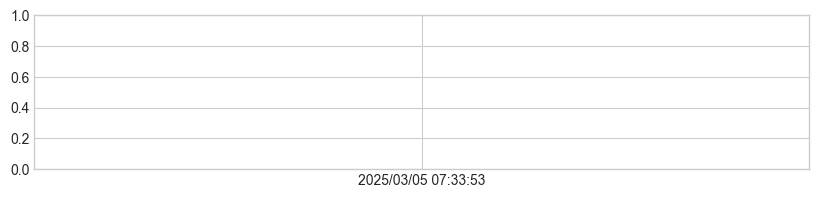

In [47]:
# Install the tsfm library
! pip install "tsfm_public[notebooks] @ git+https://github.com/ibm-granite/granite-tsfm.git@v0.2.17" -U
import matplotlib.pyplot as plt
import pandas as pd

from tsfm_public import (
    TimeSeriesForecastingPipeline,
    TinyTimeMixerForPrediction,
)
from tsfm_public.toolkit.visualization import plot_predictions
timestamp_column = "Date_Time"
target_columns = ["Sensor Glucose (mg/dL)"]
context_length = 512
input_df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
input_df = df.iloc[2689:21338]
input_df.loc[:,["Date_Time","Sensor Glucose (mg/dL)"]]
fig, axs = plt.subplots(len(target_columns), 1, figsize=(10, 2 * len(target_columns)), squeeze=False)
for ax, target_column in zip(axs, target_columns):
    ax[0].plot(input_df[timestamp_column], input_df[target_column])

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

from tsfm_public import (
    TimeSeriesForecastingPipeline,
    TinyTimeMixerForPrediction,
)
from tsfm_public.toolkit.visualization import plot_predictions
timestamp_column = "Date_Time"
target_columns = ["Sensor Glucose (mg/dL)"]
context_length = 512
input_df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
input_df = df.iloc[2689:21337]
input_df["Date_Time"] = pd.to_datetime(input_df["Date_Time"])
input_df.loc[:,["Date_Time","Sensor Glucose (mg/dL)"]]


/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2070828226.py:12: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  input_df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2070828226.py:12: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  input_df = pd.read_csv("./data.csv", parse_dates=[["Date","Time"]])
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2070828226.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

,Date_Time,Sensor Glucose (mg/dL)
2689,2025-03-05 07:33:53,122
2690,2025-03-05 07:28:53,117
2691,2025-03-05 07:23:53,112
2692,2025-03-05 07:18:53,113
2693,2025-03-05 07:13:53,116
...,...,...
21332,2024-12-30 06:00:34,87.0
21333,2024-12-30 05:55:34,85.0
21334,2024-12-30 05:50:34,83.0
21335,2024-12-30 05:45:34,81.0


/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2030149059.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2030149059.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/2030149059.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df = input_df.ffill()


<Axes: xlabel='Date_Time'>

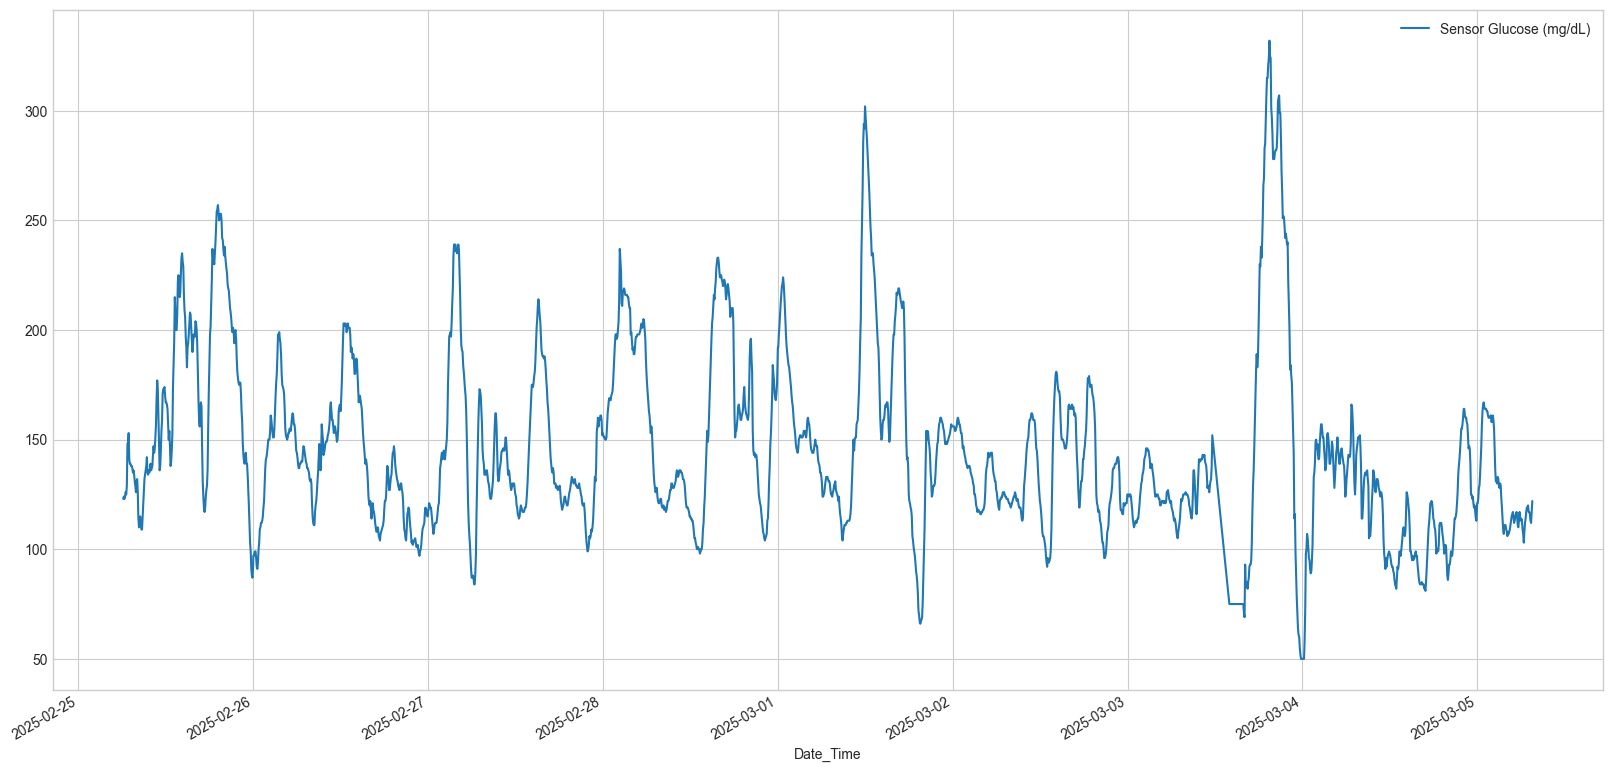

In [49]:
DATA_FILE_PATH = "data.csv"
input_df = pd.read_csv(
    DATA_FILE_PATH,
    parse_dates=[["Date", "Time"]],  # Parse the timestamp values as dates.
)
# input_df = input_df.iloc[2689:21338,:]
input_df = input_df.iloc[2689:5000,:]


# Fill NA/NaN values by propagating the last valid value.
input_df = input_df.ffill()

# Only use the last `context_length` rows for prediction.
# input_df = input_df.iloc[-context_length:,]
input_df = input_df.loc[:,["Date_Time","Sensor Glucose (mg/dL)"]]
len(input_df)
input_df.dropna()

input_df[target_column] = input_df[target_column].astype(float)
input_df["Date_Time"] = pd.to_datetime(input_df["Date_Time"])
timestamp_column = ["Date_Time"]
target_column = ["Sensor Glucose (mg/dL)"]
input_df = input_df.sort_values("Date_Time")
#input_df = pd.to_numeric(input_df["Sensor Glucose (mg/dL)"]).fillna(0).astype(int)
input_df.plot(x="Date_Time", y="Sensor Glucose (mg/dL)", figsize=(20, 10))

/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/3637097268.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/3637097268.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/3637097268.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df = input_df.ffill()
Devic

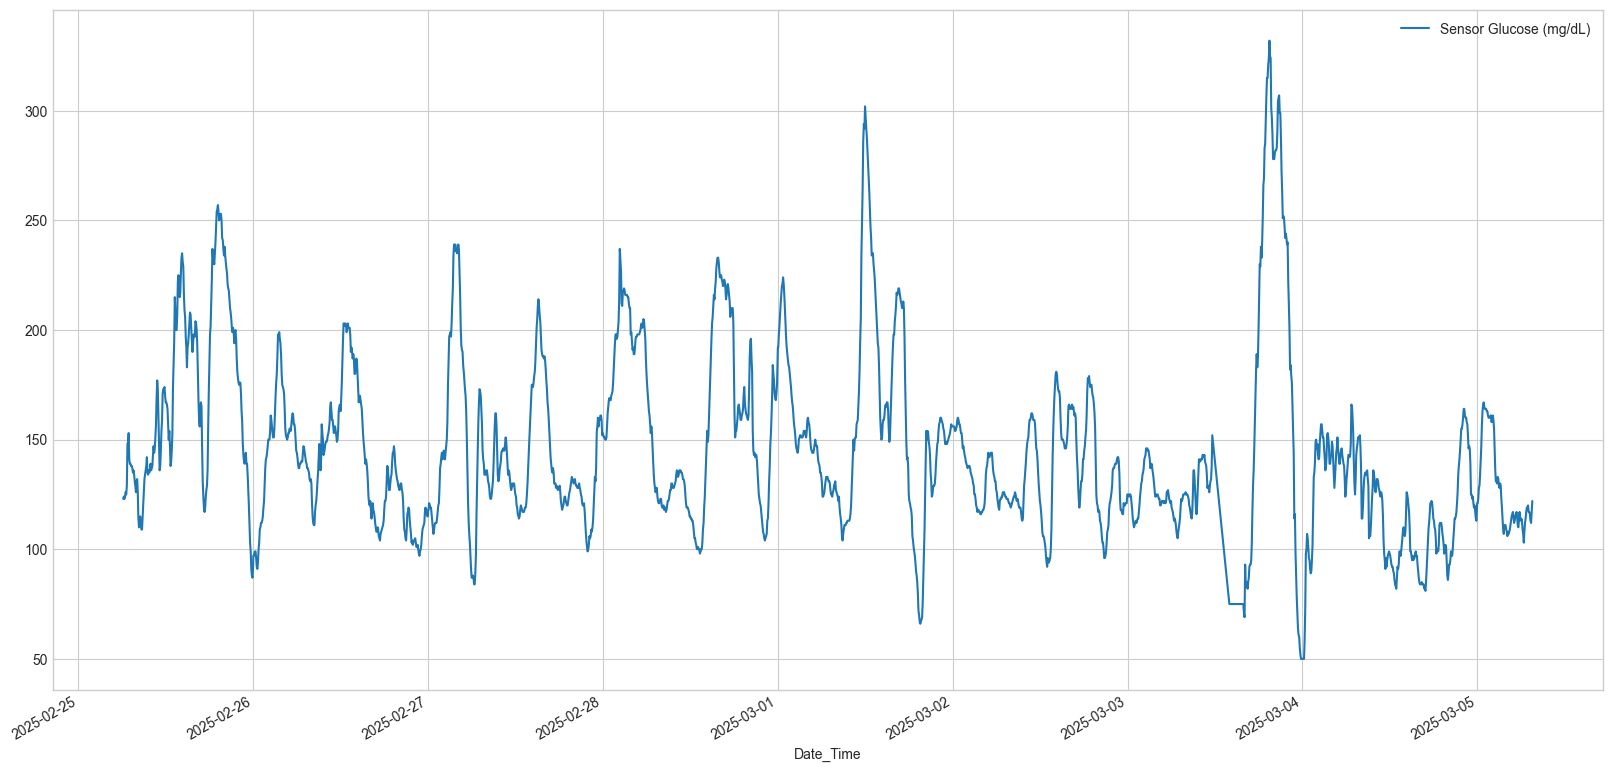

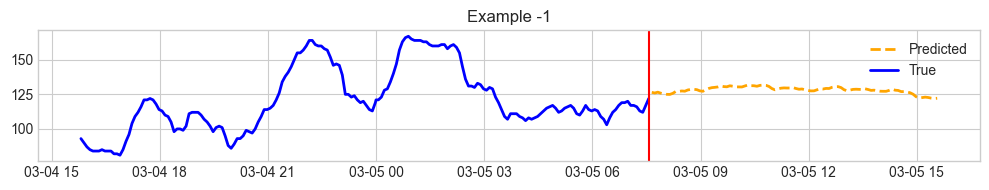

In [50]:
DATA_FILE_PATH = "data.csv"
input_df = pd.read_csv(
    DATA_FILE_PATH,
    parse_dates=[["Date", "Time"]],  # Parse the timestamp values as dates.
)
input_df = input_df.iloc[2689:5000,:]

# Fill NA/NaN values by propagating the last valid value.
input_df = input_df.ffill()

input_df = input_df.loc[:,["Date_Time","Sensor Glucose (mg/dL)"]]
input_df.dropna()

input_df[target_column] = input_df[target_column].astype(float)
input_df["Date_Time"] = pd.to_datetime(input_df["Date_Time"])

timestamp_column = ["Date_Time"]
target_column = ["Sensor Glucose (mg/dL)"]

input_df = input_df.sort_values("Date_Time")
input_df.plot(x="Date_Time", y="Sensor Glucose (mg/dL)", figsize=(20, 10))

zeroshot_model = TinyTimeMixerForPrediction.from_pretrained(
    "ibm-granite/granite-timeseries-ttm-r2",  # Name of the model on Hugging Face
    num_input_channels=len(target_column),  # tsp.num_input_channels
)

# Create a pipeline.
pipeline = TimeSeriesForecastingPipeline(
    zeroshot_model,
    timestamp_column="Date_Time",
    id_columns=[],
    target_columns=target_column,
    explode_forecasts=False,
    freq="5m",
    device="cpu",  # Specify your local GPU or CPU.
)

# Make a forecast on the target column given the input data.
zeroshot_forecast = pipeline(input_df)

# Plot the historical data and predicted series.
plot_predictions(
    input_df=input_df,
    predictions_df=zeroshot_forecast,
    freq="5m",
    timestamp_column="Date_Time",
    channel="Sensor Glucose (mg/dL)",
    indices=[-1],
    num_plots=1,
)

/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/1670283075.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/1670283075.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/1670283075.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df = input_df.ffill()
Devi

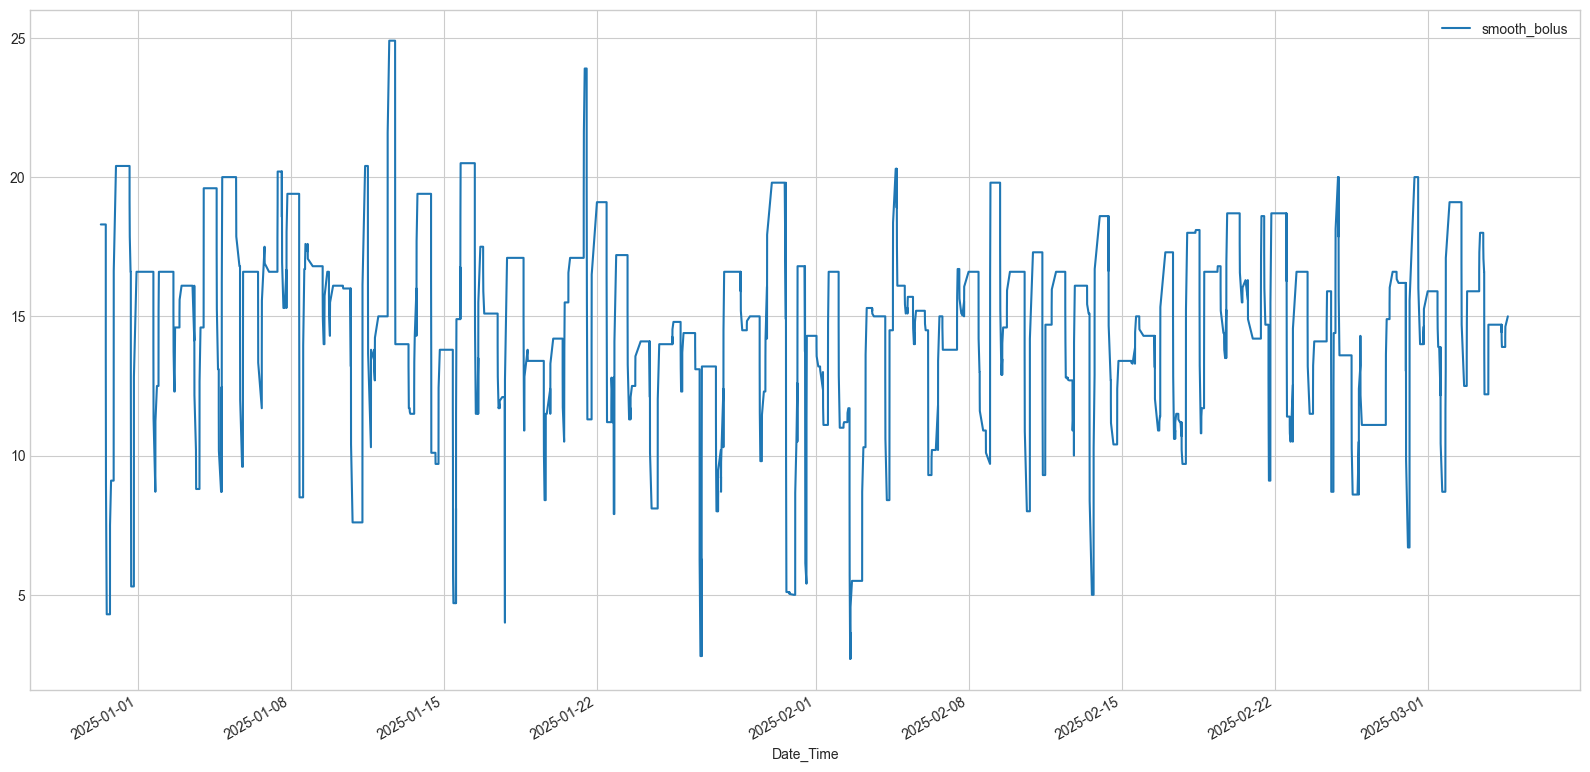

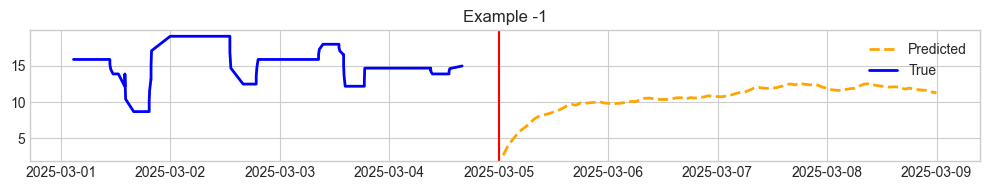

In [43]:
DATA_FILE_PATH = "data.csv"
input_df = pd.read_csv(
    DATA_FILE_PATH,
    parse_dates=[["Date", "Time"]],  # Parse the timestamp values as dates.
)
input_df = input_df.iloc[2:2615,:]

# Fill NA/NaN values by propagating the last valid value.
#input_df = input_df.fillna(0)
input_df = input_df.ffill()

input_df = input_df.loc[:,["Date_Time","Bolus Volume Delivered (U)"]]
#input_df.dropna()

timestamp_column = ["Date_Time"]
input_df["smooth_bolus"] = input_df["Bolus Volume Delivered (U)"].rolling(window=3).mean()
target_column = ["smooth_bolus"]

input_df[target_column] = input_df[target_column].astype(float)
input_df["Date_Time"] = pd.to_datetime(input_df["Date_Time"])

input_df = input_df.sort_values("Date_Time")
input_df.plot(x="Date_Time", y="smooth_bolus", figsize=(20, 10))

zeroshot_model = TinyTimeMixerForPrediction.from_pretrained(
    "ibm-granite/granite-timeseries-ttm-r2",  # Name of the model on Hugging Face
    num_input_channels=len(target_column),  # tsp.num_input_channels
)

# Create a pipeline.
pipeline = TimeSeriesForecastingPipeline(
    zeroshot_model,
    timestamp_column="Date_Time",
    id_columns=[],
    target_columns=target_column,
    explode_forecasts=False,
    freq="5m",
    device="cpu",  # Specify your local GPU or CPU.
)

# Make a forecast on the target column given the input data.
zeroshot_forecast = pipeline(input_df)

# Plot the historical data and predicted series.
plot_predictions(
    input_df=input_df,
    predictions_df=zeroshot_forecast,
    freq="h",
    timestamp_column="Date_Time",
    channel="smooth_bolus",
    indices=[-1],
    num_plots=1,
)

/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/4122075136.py:2: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/4122075136.py:2: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,47,48,49,50,51,53) have mixed types. Specify dtype option on import or set low_memory=False.
  input_df = pd.read_csv(
/var/folders/7d/2p1rhlqs0zg3j57xz29f6n6c0000gn/T/ipykernel_84368/4122075136.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  input_df = input_df.ffill()
Devi

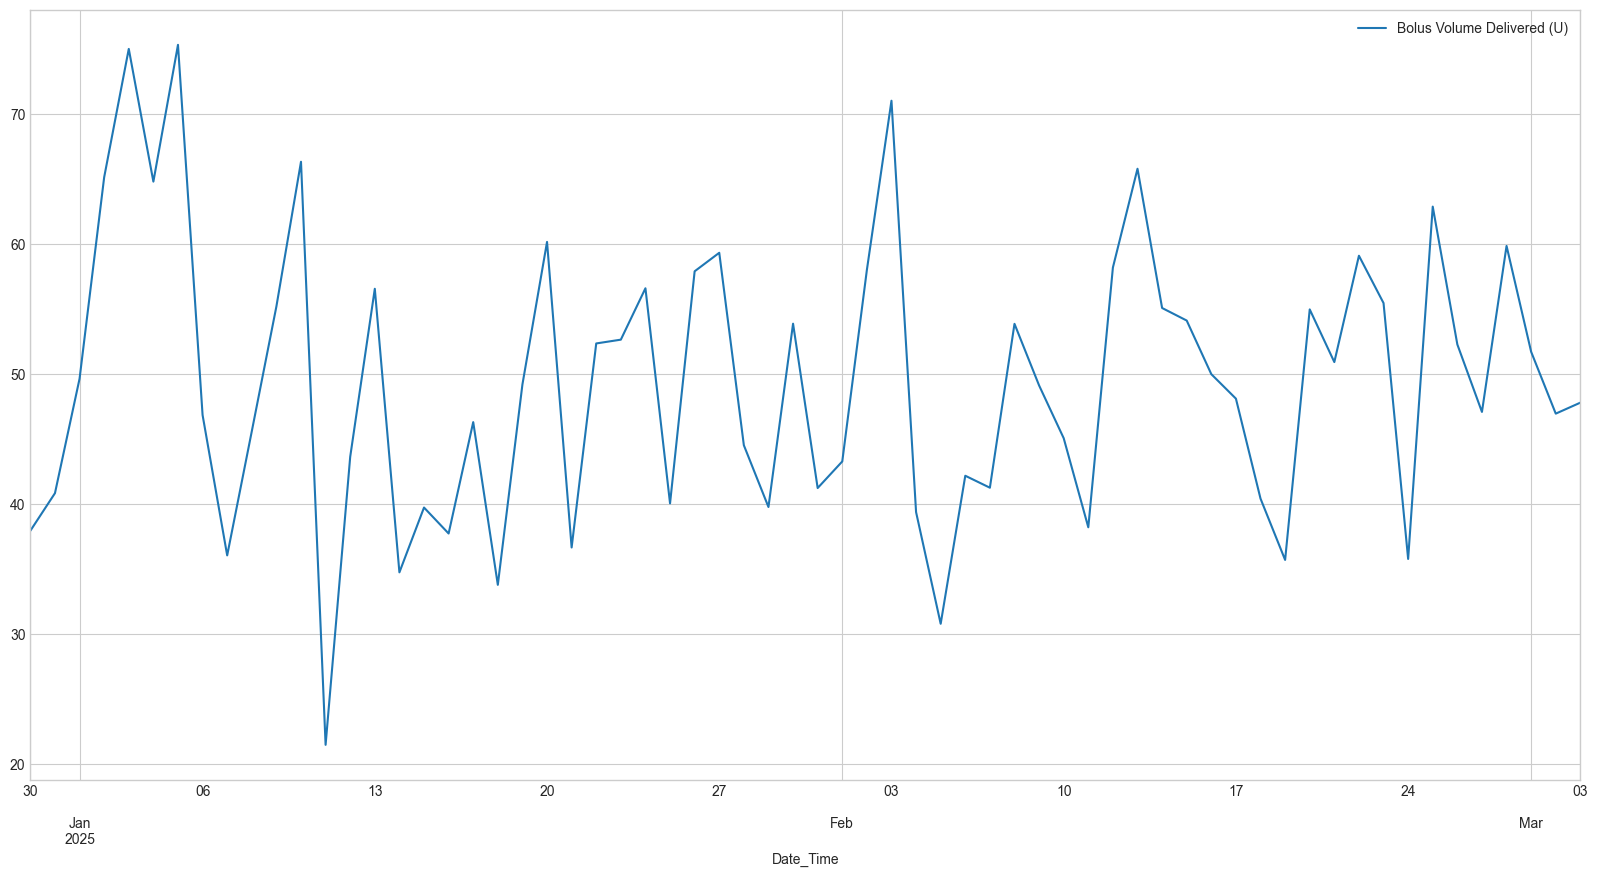

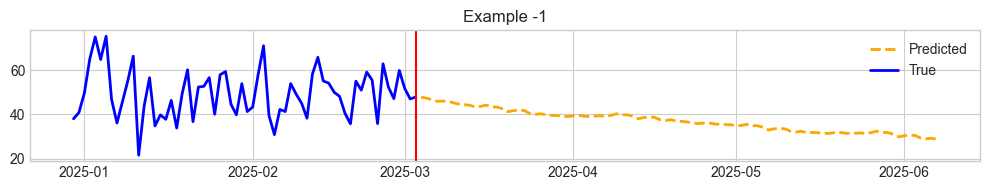

In [53]:
DATA_FILE_PATH = "data.csv"
input_df = pd.read_csv(
    DATA_FILE_PATH,
    parse_dates=[["Date", "Time"]],  # Parse the timestamp values as dates.
)
input_df = input_df.iloc[2620:2684,:]

# Fill NA/NaN values by propagating the last valid value.
#input_df = input_df.fillna(0)
input_df = input_df.ffill()

input_df = input_df.loc[:,["Date_Time","Bolus Volume Delivered (U)"]]
#input_df.dropna()

timestamp_column = ["Date_Time"]
target_column = ["Bolus Volume Delivered (U)"]

input_df[target_column] = input_df[target_column].astype(float)
input_df["Date_Time"] = pd.to_datetime(input_df["Date_Time"])

input_df = input_df.sort_values("Date_Time")
input_df.plot(x="Date_Time", y="Bolus Volume Delivered (U)", figsize=(20, 10))

zeroshot_model = TinyTimeMixerForPrediction.from_pretrained(
    "ibm-granite/granite-timeseries-ttm-r2",  # Name of the model on Hugging Face
    num_input_channels=len(target_column),  # tsp.num_input_channels
)

# Create a pipeline.
pipeline = TimeSeriesForecastingPipeline(
    zeroshot_model,
    timestamp_column="Date_Time",
    id_columns=[],
    target_columns=target_column,
    explode_forecasts=False,
    freq="d",
    device="cpu",  # Specify your local GPU or CPU.
)

# Make a forecast on the target column given the input data.
zeroshot_forecast = pipeline(input_df)

# Plot the historical data and predicted series.
plot_predictions(
    input_df=input_df,
    predictions_df=zeroshot_forecast,
    freq="d",
    timestamp_column="Date_Time",
    channel="Bolus Volume Delivered (U)",
    indices=[-1],
    num_plots=1,
)